<a href="https://colab.research.google.com/github/paulandrea0/Qualifica-PCA/blob/main/PCA_Clasificador_MLPerseptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math

df_test_1 = pd.read_csv('/gdrive/MyDrive/Sismos/VT_Z_teste.csv')
df_train_1 = pd.read_csv('/gdrive/MyDrive/Sismos/VT_Z_train.csv') 
df_test_2 = pd.read_csv('/gdrive/MyDrive/Sismos/LP_Z_teste.csv')
df_train_2 = pd.read_csv('/gdrive/MyDrive/Sismos/LP_Z_train.csv')
df_test_3 = pd.read_csv('/gdrive/MyDrive/Sismos/TOR_Z_teste.csv')
df_train_3 = pd.read_csv('/gdrive/MyDrive/Sismos/TOR_Z_train.csv')

(1480, 13348)
(256, 10993)
(362, 3000)
(40, 3000)
(61, 21494)
(6, 27408)


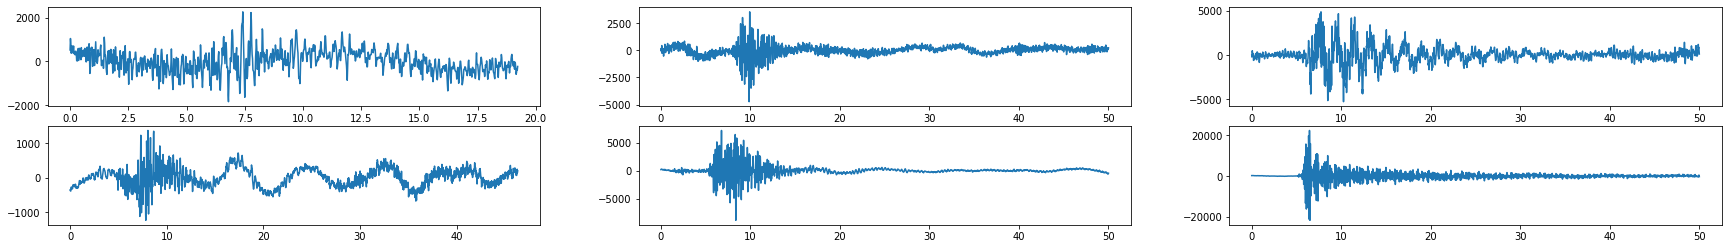

In [3]:
# Creando función para retirar el offset de los datos en DataFrame
def mean_norma(df_input):
        return df_input.apply(lambda x: (x-x.mean()), axis=1)  

df_mean_test_1 = mean_norma(df_test_1)  # Señales VT
df_mean_train_1 = mean_norma(df_train_1)
df_mean_test_2 = mean_norma(df_test_2)  # Señales LP
df_mean_train_2 = mean_norma(df_train_2)
df_mean_test_3 = mean_norma(df_test_3)  # Señales Tor
df_mean_train_3 = mean_norma(df_train_3)

print(df_mean_train_1.shape)
print(df_mean_test_1.shape)
print(df_mean_train_2.shape)
print(df_mean_test_2.shape)
print(df_mean_train_3.shape)
print(df_mean_test_3.shape)

# Convirtiendo el dataframe en array
d_train_1 = df_mean_train_1.values
d_train_1 = d_train_1[:, 0:3000]
d_test_1 = df_mean_test_1.values
d_test_1 = d_test_1[:, 0:3000]

d_train_2 = df_mean_train_2.values
d_train_2 = d_train_2[:, 0:3000]
d_test_2 = df_mean_test_2.values
d_test_2 = d_test_2[:, 0:6000]

d_train_3 = df_mean_train_3.values
d_train_3 = d_train_3[:, 0:3000]
d_test_3 = df_mean_test_3.values
d_test_3 = d_test_3[:, 0:3000]

# Dibujando la señal orioginal
n = 3000
fs = 50 # frecuencia de muestreo
t = np.linspace(0,fs,n)
plt.figure(1, figsize=(30, 4))
plt.subplot(231)
plt.plot(t, d_train_1[60])
plt.subplot(232)
plt.plot(t, d_train_2[18])
plt.subplot(233) 
plt.plot(t, d_train_3[38])
plt.subplot(234)
plt.plot(t, d_test_1[44])
plt.subplot(235)
plt.plot(t, d_test_2[34])
plt.subplot(236)
plt.plot(t, d_test_3[4])

(1480, 3000)
(256, 3000)
(362, 3000)
(40, 3000)
(61, 3000)
(6, 3000)


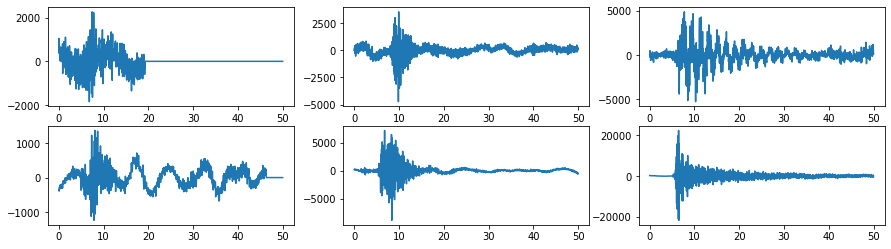

In [4]:
# Quitando los valores NaN de los array numpy

# Señales VT
d_train_1[np.isnan(d_train_1)] = 0.0
d_test_1[np.isnan(d_test_1)] = 0.0
print(d_train_1.shape)
print(d_test_1.shape)

# Señales LP
d_train_2[np.isnan(d_train_2)] = 0.0
d_test_2[np.isnan(d_test_2)] = 0.0
print(d_train_2.shape)
print(d_test_2.shape)

# Señales Tor`
d_train_3[np.isnan(d_train_3)] = 0.0
d_test_3[np.isnan(d_test_3)] = 0.0
print(d_train_3.shape)
print(d_test_3.shape)

# Graficando
plt.figure(2, figsize=(15, 4))
plt.subplot(231)
plt.plot(t, d_train_1[60])
plt.subplot(232)
plt.plot(t, d_train_2[18])
plt.subplot(233) 
plt.plot(t, d_train_3[38])
plt.subplot(234)
plt.plot(t, d_test_1[44])
plt.subplot(235)
plt.plot(t, d_test_2[34])
plt.subplot(236)
plt.plot(t, d_test_3[4])

# **P C A** 

In [5]:
from sklearn.decomposition import PCA

# concatentando los datos de entrenamiento y teste para calcular los PCA
VT = np.concatenate([d_train_1,d_test_1], axis=0) 
LP = np.concatenate([d_train_2,d_test_2], axis=0) 
Tor = np.concatenate([d_train_3,d_test_3], axis=0) 

pca = PCA(n_components=0.95)
VT_pca = pca.fit_transform(VT)
LP_pca = pca.fit_transform(LP)
Tor_pca = pca.fit_transform(Tor)

print(d_train_1.shape, d_test_1.shape, VT.shape, VT_pca.shape)
print(d_train_2.shape, d_test_2.shape, LP.shape, LP_pca.shape)
print(d_train_3.shape, d_test_3.shape, Tor.shape, Tor_pca.shape)

(1480, 3000) (256, 3000) (1736, 3000) (1736, 6)
(362, 3000) (40, 3000) (402, 3000) (402, 84)
(61, 3000) (6, 3000) (67, 3000) (67, 31)


In [6]:
sismos = np.concatenate([VT, LP, Tor], axis=0)
pca = PCA(n_components=0.95)
sismos_pca = pca.fit_transform(sismos)
print(sismos.shape, sismos_pca.shape)

(2205, 3000) (2205, 7)


Calculando 67 PCA para todos los datos de entrenamiento y prueba (67 que es la cantidad de ejemplos que se tienen para una de las clases).

In [7]:
pca = PCA(n_components=50)
vt_pc = pca.fit_transform(VT)
lp_pc = pca.fit_transform(LP)
tor_pc = pca.fit_transform(Tor)
print(vt_pc.shape, lp_pc.shape, tor_pc.shape)

(1736, 50) (402, 50) (67, 50)


Volvemos a separa el set de datos en set de entrenamiento y set de prueba para su respectiva normalización.

In [8]:
d_train_1, d_test_1 = vt_pc[0:1480 :], vt_pc[1480:1737, :]
d_train_2, d_test_2 = lp_pc[0:362 :], lp_pc[361:403, :]
d_train_3, d_test_3 = tor_pc[0:61 :], tor_pc[61:68, :]

print(d_train_1.shape, d_test_1.shape)
print(d_train_2.shape, d_test_2.shape)
print(d_train_3.shape, d_test_3.shape)

(1480, 50) (256, 50)
(362, 50) (41, 50)
(61, 50) (6, 50)


# Normalización

Mínimo y máximo originales: -2600460.4, 18090713.4
Mínimo y máximo normalizado: 0.0, 1.0
Mínimo y máximo originales: -304042.3, 1018660.3
Mínimo y máximo normalizado: 0.0, 1.0
Mínimo y máximo originales: -85848.7, 232894.7
Mínimo y máximo normalizado: 0.0, 1.0


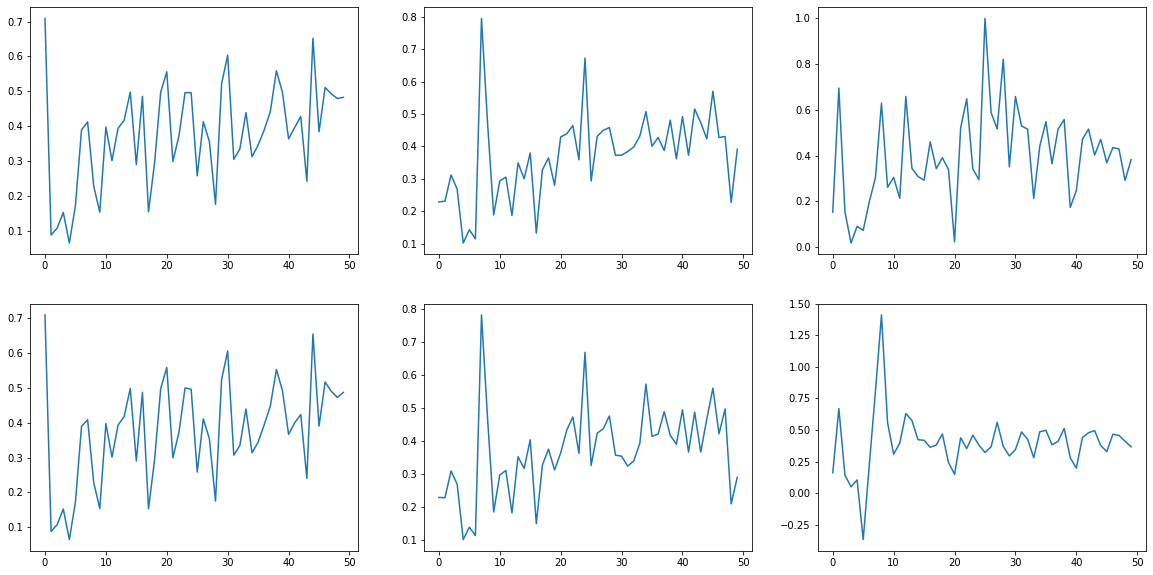

In [9]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# Señales VT
D_train_s1 = min_max_scaler.fit_transform(d_train_1)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(d_train_1), np.max(d_train_1)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(D_train_s1), np.max(D_train_s1))) 
D_test_s1 = min_max_scaler.transform(d_test_1)  

# Señales LP
D_train_s2 = min_max_scaler.fit_transform(d_train_2)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(d_train_2), np.max(d_train_2)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(D_train_s2), np.max(D_train_s2))) 
D_test_s2 = min_max_scaler.transform(d_test_2)  

# Señales Tor
D_train_s3 = min_max_scaler.fit_transform(d_train_3)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(d_train_3), np.max(d_train_3)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(D_train_s3), np.max(D_train_s3))) 
D_test_s3 = min_max_scaler.transform(d_test_3)  

# Graficando
plt.figure(3, figsize=(20, 10))
plt.subplot(231)
plt.plot(D_train_s1[60])
plt.subplot(232)
plt.plot(D_train_s2[18])
plt.subplot(233) 
plt.plot(D_train_s3[38])
plt.subplot(234)
plt.plot(D_test_s1[44])
plt.subplot(235)
plt.plot(D_test_s2[34])
plt.subplot(236)
plt.plot(D_test_s3[4])

# **Classificação com MLPerceptron**

Preparando los datos para ser presentados en el clasificador

In [10]:
# a continuación son adicionadas tres columnas que me permitirán ser usadas de etiquetas para los tipos de sismos
D_train_s1 = np.insert(D_train_s1, [0], (1,0,0), axis=1)
D_test_s1 = np.insert(D_test_s1, [0], (1,0,0), axis=1)
D_train_s2 = np.insert(D_train_s2, [0], (0,1,0), axis=1)
D_test_s2 = np.insert(D_test_s2, [0], (0,1,0), axis=1)
D_train_s3 = np.insert(D_train_s3, [0], (0,0,1), axis=1)
D_test_s3 = np.insert(D_test_s3, [0], (0,0,1), axis=1)

print(D_train_s1[1,0:5], D_test_s1[1,0:5])
print(D_train_s2[1,0:5], D_test_s2[1,0:5])
print(D_train_s3[1,0:5], D_test_s3[1,0:5])
print(D_train_s1[1,0:5], D_test_s1[1,0:5])
print(D_train_s2[1,0:5], D_test_s2[1,0:5])
print(D_train_s3[1,0:5], D_test_s3[1,0:5])

# Creo mi set de entrenamiento con sismos y sus etiquetas correspondientes y lo mismo para mi set de prueba
set_train = np.concatenate([D_train_s1,D_train_s2, D_train_s3], axis=0) 
set_test = np.concatenate([D_test_s1,D_test_s2, D_test_s3], axis=0) 
y_vector = np.concatenate([set_train, set_test])
y_vector = y_vector[:,0:3]
# le doy una mezcla a los datos para que entren en desorden en la red neuronal
np.random.shuffle(set_train)
np.random.shuffle(set_test)

print(set_train.shape, set_test.shape)

[1.         0.         0.         0.70926998 0.08769767] [1.         0.         0.         0.70930351 0.08773183]
[0.         1.         0.         0.22917182 0.23089353] [0.         1.         0.         0.22849763 0.22968349]
[0.         0.         1.         0.14981517 0.66598995] [0.         0.         1.         0.1602789  0.66023212]
[1.         0.         0.         0.70926998 0.08769767] [1.         0.         0.         0.70930351 0.08773183]
[0.         1.         0.         0.22917182 0.23089353] [0.         1.         0.         0.22849763 0.22968349]
[0.         0.         1.         0.14981517 0.66598995] [0.         0.         1.         0.1602789  0.66023212]
(1903, 53) (303, 53)


In [11]:
print(set_train.shape, set_test.shape)
y_train, X_train =  set_train[:,0:3], np.delete(set_train, range(0, 3), axis=1)
y_test, X_test = set_test[:,0:3], np.delete(set_test, range(0, 3), axis=1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(y_train[1,0:5], X_train[1,0:5])
print(y_test[1,0:5], X_test[1,0:5])

(1903, 53) (303, 53)
(1903, 50) (1903, 3) (303, 50) (303, 3)
[0. 0. 1.] [0.17807188 0.57785005 0.16480203 0.08282571 0.05837074]
[1. 0. 0.] [0.70824337 0.0875651  0.10732891 0.15245092 0.06249227]


Entrenamos un MLP para clasificar tres clases de sismos

In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras import Sequential
from keras.regularizers import l2 # cuando hay sobreajuste la regularización ayuda
# a decartar valores altos en la función de costo. Se puede colocar en cualquier capa
from keras.layers import Dropout  #apagar aleatoriamente algunas neuronas, 
# ayudando a eliminar el sobreajuste
from keras.callbacks import EarlyStopping

In [18]:
np.random.seed(23)

dim_entrada = X_train.shape[1]      
entrada = Input(shape=(dim_entrada,))
print(X_train.shape[1])      

x = Dense(500, activation='relu', kernel_regularizer=l2(0.005))(entrada)
x = Dropout(0.25)(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.25)(x)
saida = Dense(3, activation='softmax')(x)

clasificador = Model(inputs=entrada, outputs=saida)
clasificador.summary()

50
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50)]              0         
                                                                 
 dense_3 (Dense)             (None, 500)               25500     
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               50100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 303       
                                                                 
Total params: 75,903
Trainable params: 75,903
Non-traina

In [19]:
clasificador = Model(inputs=entrada, outputs=saida)
clasificador.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = clasificador.fit(X_train, y_train,    
                           epochs=15,
                           batch_size=150,
                           validation_data=(X_test, y_test),    
                           shuffle=True)

Epoch 1/15
13/13 [==============================] - 1s 15ms/step - loss: 0.6666 - accuracy: 0.7336 - val_loss: 0.4647 - val_accuracy: 0.8449
Epoch 2/15
13/13 [==============================] - 0s 5ms/step - loss: 0.4650 - accuracy: 0.7777 - val_loss: 0.3697 - val_accuracy: 0.8449
Epoch 3/15
13/13 [==============================] - 0s 5ms/step - loss: 0.3785 - accuracy: 0.7777 - val_loss: 0.2934 - val_accuracy: 0.8449
Epoch 4/15
13/13 [==============================] - 0s 5ms/step - loss: 0.3109 - accuracy: 0.7777 - val_loss: 0.2363 - val_accuracy: 0.8449
Epoch 5/15
13/13 [==============================] - 0s 5ms/step - loss: 0.2615 - accuracy: 0.7777 - val_loss: 0.1956 - val_accuracy: 0.8449
Epoch 6/15
13/13 [==============================] - 0s 7ms/step - loss: 0.2265 - accuracy: 0.7777 - val_loss: 0.1672 - val_accuracy: 0.8449
Epoch 7/15
13/13 [==============================] - 0s 5ms/step - loss: 0.1843 - accuracy: 0.8234 - val_loss: 0.0951 - val_accuracy: 0.9769
Epoch 8/15
13/13 [=

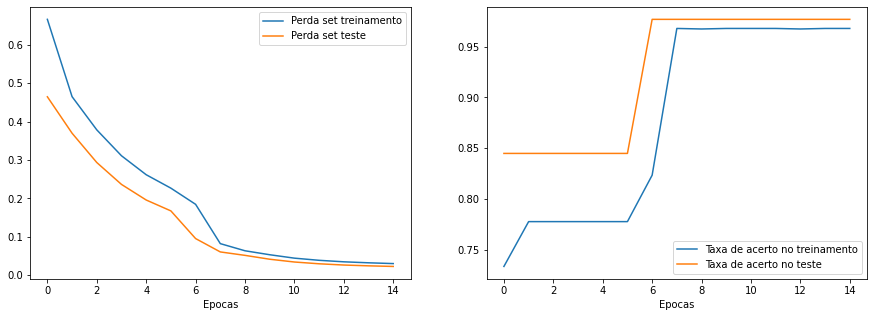

In [20]:
import matplotlib.pyplot as plt
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Perda set treinamento")
plt.plot(historia.history["val_loss"], label="Perda set teste")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Taxa de acerto no treinamento")
plt.plot(historia.history["val_accuracy"], label="Taxa de acerto no teste")
plt.xlabel('Epocas')
plt.legend()

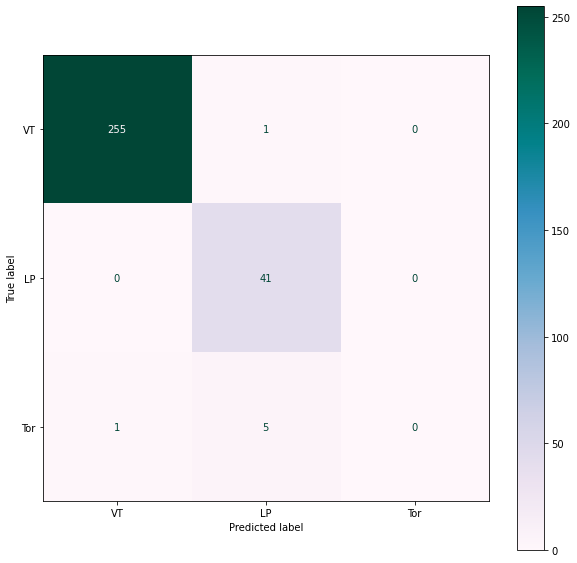

[[[ 46   1]
  [  1 255]]

 [[256   6]
  [  0  41]]

 [[297   0]
  [  6   0]]]
matriz VT  [[ 46   1]
 [  1 255]]
matriz LP  [[256   6]
 [  0  41]]
matriz Tor  [[297   0]
 [  6   0]]


In [21]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix

clasificador = Model(inputs=entrada, outputs=saida)
y_pred = clasificador.predict(X_test)

y_pred_ = np.rint(y_pred)

y_true = []
for i in range(len(y_test)):
  if y_test[i,0] > 0:
    y_true.append('VT')
  if y_test[i,1] > 0:
    y_true.append('LP')
  if y_test[i,2] > 0:
    y_true.append('Tor')

y_salida = []
for i in range(len(y_pred_)):
  if y_pred_[i,0] > 0:
    y_salida.append('VT')
  if y_pred_[i,1] > 0:
    y_salida.append('LP')
  if y_pred_[i,2] > 0:
    y_salida.append('Tor')

# Matriz de confusión multiclase
c = confusion_matrix ( y_true , y_salida , labels = ["VT", "LP", "Tor"] , sample_weight = None )
disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=["VT", "LP", "Tor"])
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap = 'PuBuGn', colorbar = True)
plt.show()

plt.show()
cm = multilabel_confusion_matrix(y_true, y_salida, labels=["VT", "LP", "Tor"])
print(cm)

cmVT = cm[0]
cmLP = cm[1]
cmTor = cm[2]

print('matriz VT ', cmVT)
print('matriz LP ', cmLP)
print('matriz Tor ', cmTor)

**Sensitividad y Especificidad**

*   Verdaderos Positivos (TP): La clase de sismo de interés que ha sido clasificada correctamente, 
*   Falsos negativos (FN): La clase de sismo de interés que fue clasificada como otro tipo de sismo,
*   Verdadero negativo (TN): Otros tipo de sismo que fue correctamente clasificado como un tipo de sismo diferente a la clase de interés, y
*   Falsos positivos (FP): cuando un sismo diferente fue clasificado como si fuera el simo de la clase de interés.

La ** sensitividad** mide la proporción de los sismos de interés detectados correctamente, una sensitividad del 100% detectará todos los sismos de interés:

$$Sensitividad = \dfrac{TP}{TP+FN}$$

La **especificidad** mide la proporción de otro tipo de sismos que fueron detectados correctamente diferentes a la clase de interés. Una especificidad del 100% detectará sismos diferentes a la clase de interés:
$$Especificidad = \dfrac{TN}{TN+FP}$$

In [22]:
def calcular_sensitividad(clase_sismo):
  if clase_sismo =='VT':
    CM = cmVT
  if clase_sismo =='LP':
    CM = cmLP
  if clase_sismo =='Tor':
    CM = cmTor
  TP = CM[1,1]
  FN = CM[0,1]
  sen = 100*(TP/(TP+FN))
  print('Sensitividad ' + clase_sismo + ': {:.1f}%'.format(sen))
  return sen


def calcular_especificidad(clase_sismo):
  if clase_sismo =='VT':
    CM = cmVT
  if clase_sismo =='LP':
    CM = cmLP
  if clase_sismo =='Tor':
    CM = cmTor
  TN = CM[0,0]
  FP = CM[1,0]
  esp = 100*(TN/(TN+FP))
  print('Especificidad ' + clase_sismo + ': {:.1f}%'.format(esp))
  return esp


def calcular_precision(clase_sismo):
  if clase_sismo =='VT':
    CM = cmVT
  if clase_sismo =='LP':
    CM = cmLP
  if clase_sismo =='Tor':
    CM = cmTor
  TP = CM[1,1]
  FP = CM[1,0]
  pres = 100*(TP/(TP+FP))
  print('Precisión ' + clase_sismo + ': {:.1f}%'.format(pres))
  return pres  


def calcular_f1(sencitividad, precision, clase_sismo):
  f1 = 2*(precision*sencitividad)/(precision+sencitividad)
  print('f1 score ' + clase_sismo + ': {:.1f}%'.format(f1))
  return f1 

In [23]:
# Calculo de Especificidad
esp_1 = calcular_especificidad('VT')
esp_2 = calcular_especificidad('LP')
esp_3 = calcular_especificidad('Tor')

# Cálculo de Sensitividad
sen_1 = calcular_sensitividad('VT')
sen_2 = calcular_sensitividad('LP')
sen_3 = calcular_sensitividad('Tor')

# Cálculo de Precisión
pres_1 = calcular_precision('VT')
pres_2 = calcular_precision('LP')
pres_3 = calcular_precision('Tor')

# Cálculo de f1 score
f1_1 = calcular_f1(sen_1,pres_1,'VT')
f1_2 = calcular_f1(sen_2,pres_2,'LP')
f1_3 = calcular_f1(sen_3,pres_3,'Tor')

Especificidad VT: 97.9%
Especificidad LP: 100.0%
Especificidad Tor: 98.0%
Sensitividad VT: 99.6%
Sensitividad LP: 87.2%
Sensitividad Tor: nan%
Precisión VT: 99.6%
Precisión LP: 100.0%
Precisión Tor: 0.0%
f1 score VT: 99.6%
f1 score LP: 93.2%
f1 score Tor: nan%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


In [24]:
from sklearn.metrics import classification_report
# y_pred_label, y_test_label
target_names = ['VT', 'LP', 'Tor']
print(classification_report(y_test, y_pred_, target_names=target_names))

              precision    recall  f1-score   support

          VT       1.00      1.00      1.00       256
          LP       0.87      1.00      0.93        41
         Tor       0.00      0.00      0.00         6

   micro avg       0.98      0.98      0.98       303
   macro avg       0.62      0.67      0.64       303
weighted avg       0.96      0.98      0.97       303
 samples avg       0.98      0.98      0.98       303



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
lw = 3


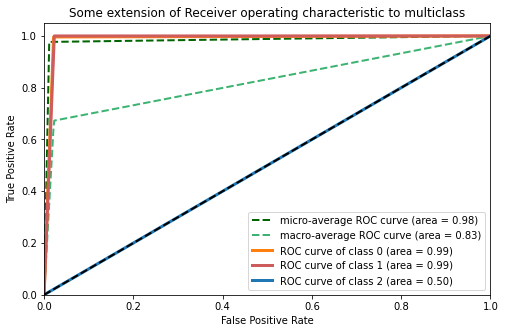

In [26]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8,5))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="darkgreen", #deeppink
    linestyle="--",
    linewidth=2,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="mediumseagreen", #
    linestyle="--",
    linewidth=2,
)

colors = cycle(["tab:orange", "indianred", "tab:blue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()